In [43]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import sympy
from sympy.solvers import solve
from sympy import symbols
import math

(300, 600)
(150, 300)
(375, 1242, 3)


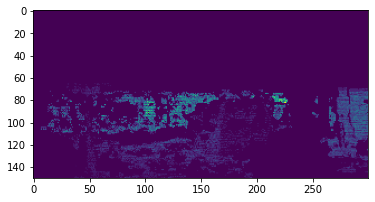

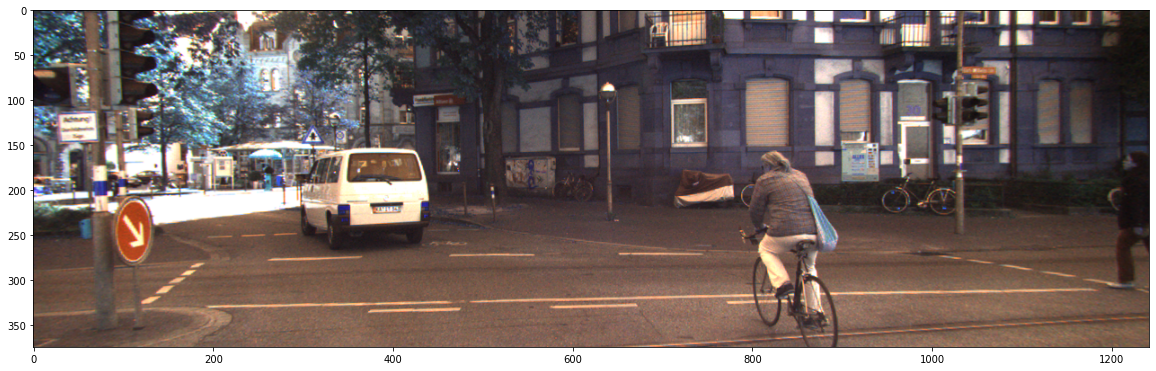

In [41]:
DATA_PATH = "../../data"
DEPTH_PATH = os.path.join(DATA_PATH, "data_depth_self_compiled")
TRAIN_PATH = os.path.join(DEPTH_PATH, "training")
TRAIN_RGB_PATH = os.path.join(TRAIN_PATH, "image_2")
TRAIN_DEPTH_PATH = os.path.join(TRAIN_PATH, "depth")

TEST_PATH = os.path.join(DEPTH_PATH, "testing")
TEST_RGB_PATH = os.path.join(TEST_PATH, "image_2")
TEST_DEPTH_PATH = os.path.join(TEST_PATH, "depth")

rgbs = sorted(os.listdir(TEST_RGB_PATH))
depths = sorted(os.listdir(TEST_DEPTH_PATH))

x = cv2.imread(os.path.join(TEST_DEPTH_PATH, depths[3]))
x = x[:300,:600,0]
print(x.shape)
x = cv2.resize(x, (x.shape[1]//2, x.shape[0]//2))
print(x.shape)
plt.figure()
plt.imshow(x)
dep_map = x

x1 = cv2.imread(os.path.join(TEST_RGB_PATH, rgbs[3]))
plt.figure(figsize=(20,10))
plt.imshow(x1)
print(x1.shape)

In [33]:
X, Y, Z = symbols('X Y Z')
u = 224
v = 456
w = 50
f_x = 2571.4
f_y = 2571.4
c_x = 0
c_y = 0

sol = solve((
    f_x*(X/Z) + c_x - u,
    f_y*(Y/Z) + c_y - v, 
    sympy.sqrt(X**2 + Y**2 + Z**2) - w,))
print(sol)

print(float(sol[0][X]), float(sol[0][Y]), float(sol[0][Z]))
print(float(sol[1][X]), float(sol[1][Y]), float(sol[1][Z]))

[{X: -4.27300122987190, Y: -8.69860964652495, Z: -49.0517650111277}, {X: 4.27300122987190, Y: 8.69860964652495, Z: 49.0517650111277}]
-4.2730012298719044 -8.698609646524949 -49.05176501112775
4.2730012298719044 8.698609646524949 49.05176501112775


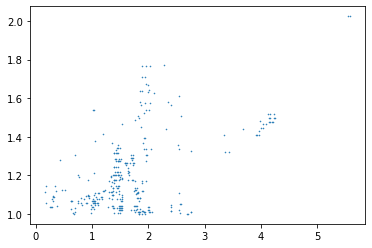

In [63]:
def pixelDep2Voxel(u, v, D):
    f_len = 2500
    d = math.sqrt(u**2 + v**2 + f_len**2)
    r = D / d
    return np.array([u*r, v*r, f_len*r])
    
    
def depImg2Voxels(dep_map):
    voxels = []
    for y in range(dep_map.shape[0]):
        for x in range(dep_map.shape[1]):
            voxel = pixelDep2Voxel(x, y, dep_map[y, x])
            voxels.append(voxel)
    return np.array(voxels)


def voxels2Bev(voxels):
    coord2d = []
    for voxel in voxels:
        if voxel[1] > 1:
            coord2d.append(np.array([voxel[0], voxel[1]]))
    return np.array(coord2d)


def plotBev(coord2d):
    x = coord2d[:,0]
    y = coord2d[:,1]

    plt.scatter(x, y, s=0.3)


voxels = depImg2Voxels(dep_map)
coord2d = voxels2Bev(voxels)
plotBev(coord2d)

# i = 0
# for voxel in voxels:
#     if voxel[1] != 0:
#         print(voxel)
